In [12]:
import os
import sys
import glob
import pandas as pd
import numpy as np
from scipy.io import loadmat
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import behav as bh
import tkinter as tk
from tkinter import filedialog, ttk
import warnings
warnings.simplefilter("ignore")

For fitting the psychometric data, the table should be in the format:

| Intensity | Lick L    | Lick R    |
| --------- | --------- | --------- |
| 0.0       | <total L> | <total R> |
| 1.2       | <total L> | <total R> |
| 2.0       | <total L> | <total R> |

In [2]:
base_path = r'.'
total_mat = bh.load_mat_files(base_path, 
                            mouse_id = 'C2', 
                            day_start = 1, 
                            day_end = 69)
data = bh.extract_data_to_df(total_mat)
processed_data = bh.round_stim_data(data) 

In [3]:
for index, row in processed_data.iterrows():
    if row['optoStim'] != 'none':
        print(row['file'])
        break
# set(processed_data['optoStim'])

.\C2\Day 51, 2025-05-14.mat


In [4]:
print(processed_data[processed_data['file'] == r'.\C2\Day 51, 2025-05-14.mat'])


       trial_type  stim_left  stim_right optoStim                         file
15166           4       2.00         0.0     none  .\C2\Day 51, 2025-05-14.mat
15167           3       2.00         0.0     none  .\C2\Day 51, 2025-05-14.mat
15168          18       0.00         0.0     none  .\C2\Day 51, 2025-05-14.mat
15169           5       2.00         0.0     none  .\C2\Day 51, 2025-05-14.mat
15170           3       2.00         0.0     none  .\C2\Day 51, 2025-05-14.mat
...           ...        ...         ...      ...                          ...
15393           3       1.00         0.0  control  .\C2\Day 51, 2025-05-14.mat
15394           3       2.00         0.0   S1C2-R  .\C2\Day 51, 2025-05-14.mat
15395           4       1.33         0.0  control  .\C2\Day 51, 2025-05-14.mat
15396          19       0.00         0.0  control  .\C2\Day 51, 2025-05-14.mat
15397          19       0.00         0.0  control  .\C2\Day 51, 2025-05-14.mat

[232 rows x 5 columns]


In [7]:
base_path = r'.'
opto_mat = bh.load_mat_files(base_path, 
                            mouse_id = 'C2', 
                            day_start = 51, 
                            day_end = 69)
o_data = bh.extract_data_to_df(opto_mat)
opto_data = bh.round_stim_data(o_data) 

In [8]:
set(opto_data['optoStim'])

{'ALM-L',
 'ALM-R',
 'ALM-R, ALM-L',
 'MM-R, MM-L',
 'S1-L',
 'S1-R',
 'S1C2-L',
 'S1C2-R',
 'control',
 'none'}

In [9]:
psych_table = bh.make_psych_table(opto_data, optoStim='ALM-R')
psych_table = bh.take_needed_ints_only(psych_table, max_val = 1.2)
psych_table
    

array([[0.        , 0.16      , 0.82      ],
       [1.        , 0.84210526, 0.15789474],
       [1.2       , 0.875     , 0.125     ],
       [0.8       , 0.8       , 0.2       ],
       [0.2       , 0.06666667, 0.93333333],
       [0.4       , 0.2       , 0.6       ],
       [0.6       , 0.66666667, 0.33333333]])

In [10]:
fit_params = bh.psych_fit(psych_table)
bh.calc_psych_curve(fit_params)

array([ 8.49039952,  8.52129724,  8.5522969 ,  8.58339875,  8.61460305,
        8.64591007,  8.67732006,  8.70883327,  8.74044999,  8.77217045,
        8.80399493,  8.83592368,  8.86795696,  8.90009504,  8.93233817,
        8.96468662,  8.99714064,  9.0297005 ,  9.06236646,  9.09513877,
        9.12801771,  9.16100352,  9.19409647,  9.22729683,  9.26060484,
        9.29402078,  9.3275449 ,  9.36117747,  9.39491874,  9.42876897,
        9.46272844,  9.49679738,  9.53097608,  9.56526478,  9.59966375,
        9.63417325,  9.66879353,  9.70352487,  9.73836751,  9.77332173,
        9.80838777,  9.8435659 ,  9.87885637,  9.91425946,  9.94977541,
        9.98540449, 10.02114696, 10.05700307, 10.09297308, 10.12905726,
       10.16525586, 10.20156914, 10.23799735, 10.27454077, 10.31119963,
       10.34797421, 10.38486476, 10.42187153, 10.45899479, 10.49623479,
       10.53359178, 10.57106603, 10.60865779, 10.64636731, 10.68419486,
       10.72214068, 10.76020503, 10.79838817, 10.83669035, 10.87

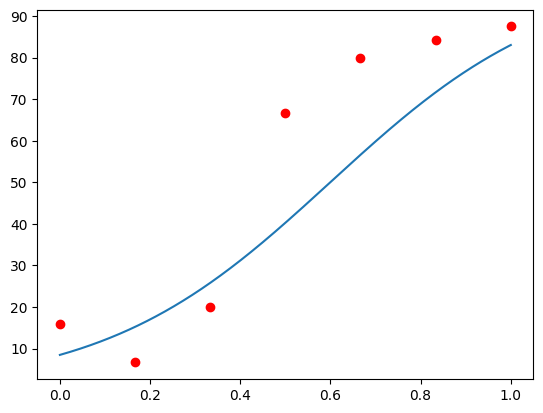

In [13]:
plt.scatter(psych_table[:, 0]/1.2, psych_table[:, 1]*100, c = 'r')
plt.plot(np.linspace(0, 1, 1000), bh.calc_psych_curve(fit_params))